<a href="https://colab.research.google.com/github/DmitriiDenisov/research-DT-Logreg/blob/master/Logreg_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

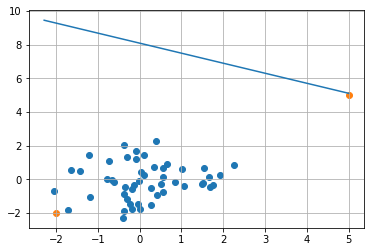

In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

np.random.seed(7)
n = 50
X_0 = np.random.randn(n,2)
X_1 = np.array([[5,5], [-2., -2.]])
y = np.array(n*[0]+2*[1])
X = np.vstack([X_0, X_1])

lr = LogisticRegression(class_weight=None, penalty='none') # C=1
lr.fit(X, y)
b = lr.intercept_[0] # -1.9
m0 = lr.coef_[0][0]
m1 = lr.coef_[0][1]

x_vals = np.linspace(X.min(),X.max(),100)
y_vals = -(m0/m1)*x_vals - b/m1


plt.scatter(X[y==0][:,0], X[y==0][:,1])
plt.scatter(X[y==1][:,0], X[y==1][:,1])
plt.plot(x_vals, y_vals)
plt.grid(True)
plt.show()

In [ ]:
# 1. Получить, что log_loss = кастомная формула
from sklearn.metrics import log_loss
import numpy as np

y_true = np.array([0, 0, 1, 1])
# y_pred = [[.9, .1], [.8, .2], [.3, .7], [.01, .99]]
y_pred = np.array([0.1, 0.2, 0.7, 0.99])
ans = log_loss(y_true, y_pred)
print(ans)
ans_2 = np.mean(-(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)))
print(ans_2)
assert ans == ans_2

# 2. Получить, что y_pred = sigmoid(w^T * X)
y_pred = lr.predict_proba(X)[:, 1]
y_pred_form = 1 / (1 + np.exp( - (np.dot(X, lr.coef_.T) + lr.intercept_).flatten() ))
assert (y_pred == y_pred_form).all()

# 3. Собрать всё вместе
print(log_loss(y, y_pred_form))
assert  log_loss(y, y_pred_form) == np.mean(-(y * np.log(y_pred_form) + (1 - y) * np.log(1 - y_pred_form)))

0.1738073366910675
0.1738073366910675
0.1403187412320377


In [ ]:
y_pred_form = 1 / (1 + np.exp( - (np.dot(X, lr.coef_.T) + lr.intercept_).flatten() ))
log_loss(y, y_pred_form) == np.mean(-(y * np.log(y_pred_form) + (1 - y) * np.log(1 - y_pred_form)))

True

In [ ]:
y_pred_form = 1 / (1 + np.exp( - (np.dot(X, lr.coef_.T) + lr.intercept_).flatten() ))
np.mean(-(y * np.log(y_pred_form) + (1 - y) * np.log(1 - y_pred_form)))

0.1403187412320377

In [ ]:
y_pred_form = 1 / (1 + np.exp( - (np.dot(X, lr.coef_.T) - 1.9).flatten() ))
np.mean(-(y * np.log(y_pred_form) + (1 - y) * np.log(1 - y_pred_form)))

0.21408619577894694

In [ ]:
-(y * np.log(y_pred_form) + (1 - y) * np.log(1 - y_pred_form))

array([0.18057501, 0.16228948, 0.11415265, 0.07391763, 0.22113868,
       0.11182264, 0.14431517, 0.0775079 , 0.1673412 , 0.08630953,
       0.22144303, 0.25574176, 0.08166539, 0.05461992, 0.15662576,
       0.16887838, 0.11092389, 0.06440333, 0.17253019, 0.19290033,
       0.16155335, 0.12308804, 0.04636944, 0.32932191, 0.12378781,
       0.2425999 , 0.15634473, 0.12069793, 0.11581002, 0.20660491,
       0.06349929, 0.24520481, 0.0917776 , 0.07012607, 0.08437666,
       0.18349481, 0.23599963, 0.18826483, 0.19589062, 0.06970712,
       0.22384994, 0.11135169, 0.1073293 , 0.20364654, 0.25603717,
       0.20246759, 0.13526959, 0.11514336, 0.3246722 , 0.10790944,
       0.22967848, 3.24150554])

In [ ]:
y_new = y.copy()
y_new[y_new == 0] = -1
y_new

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1])

In [ ]:
np.log(1 + np.exp(-y_new * (np.dot(X, lr.coef_.T) + lr.intercept_).flatten() ))

array([0.03753056, 0.0334825 , 0.02309859, 0.01471633, 0.04671819,
       0.02260587, 0.02955923, 0.01545349, 0.0345951 , 0.01726956,
       0.04678821, 0.05478586, 0.01630974, 0.01079001, 0.03224033,
       0.03493452, 0.02241605, 0.01277301, 0.03574249, 0.04029179,
       0.03332074, 0.02499656, 0.00912971, 0.07266406, 0.02514576,
       0.05169662, 0.03217883, 0.02448757, 0.02344963, 0.04339313,
       0.01258912, 0.05230649, 0.0184042 , 0.01394013, 0.01686966,
       0.03818229, 0.05015679, 0.0392502 , 0.04096568, 0.01385451,
       0.04734261, 0.02250639, 0.02165822, 0.04272087, 0.05485566,
       0.04245339, 0.02760563, 0.02330837, 0.07150465, 0.02178038,
       0.84849379, 4.8532615 ])

In [ ]:
np.log(1 + np.exp(-y_new * (np.dot(X, lr.coef_.T) - 1.9).flatten() ))

array([0.18057501, 0.16228948, 0.11415265, 0.07391763, 0.22113868,
       0.11182264, 0.14431517, 0.0775079 , 0.1673412 , 0.08630953,
       0.22144303, 0.25574176, 0.08166539, 0.05461992, 0.15662576,
       0.16887838, 0.11092389, 0.06440333, 0.17253019, 0.19290033,
       0.16155335, 0.12308804, 0.04636944, 0.32932191, 0.12378781,
       0.2425999 , 0.15634473, 0.12069793, 0.11581002, 0.20660491,
       0.06349929, 0.24520481, 0.0917776 , 0.07012607, 0.08437666,
       0.18349481, 0.23599963, 0.18826483, 0.19589062, 0.06970712,
       0.22384994, 0.11135169, 0.1073293 , 0.20364654, 0.25603717,
       0.20246759, 0.13526959, 0.11514336, 0.3246722 , 0.10790944,
       0.22967848, 3.24150554])